[The challenges of modeling churn](https://neilpatel.com/blog/modeling-churn/)

[Why churn analysis is valuable for companies](https://www.datascience.com/blog/what-is-a-churn-analysis-and-why-is-it-valuable-for-business)

[Git social](https://github.com/VinaySagar92/Git-Social)

[Azure revenue](https://www.forbes.com/sites/bobevans1/2018/10/29/1-microsoft-beats-amazon-in-12-month-cloud-revenue-26-7-billion-to-23-4-billion-ibm-third/#2c9e12912bf1)

[Why did Microsoft pay so much for GitHub](https://hbr.org/2018/06/why-microsoft-is-willing-to-pay-so-much-for-github)


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns

import helper as h

[Group each in BigQuery](https://stackoverflow.com/questions/22600299/understanding-resources-exceeded-during-query-execution-with-group-each-by-in)

In [2]:
user_data = h.get_merged_data(appName='data-exploration', year='2016')
user_data = user_data.toPandas()
user_data.head().transpose()

Threshold events N: 200
% of users dropped 4.7


,0,1,2,3,4
login,0loky0,13246864965,1xPdd,2582056905xy,277542952
followers_count,0,0,0,2,1
following_count,1,0,0,6,28
blog,0,0,0,0,0
company,0,0,0,0,0
created_at,2011-05-24 16:15:25,2016-04-14 06:04:50,2014-07-10 23:45:56,2014-04-24 10:51:26,2016-03-15 23:17:58
public_repos_count,7,3,0,35,1
public_gists_count,0,0,0,0,0
hireable,1,0,0,0,0
recency,1788,0,684,734,70


In [3]:
user_data = user_data.dropna()
user_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
followers_count,183575.0,4.105085,36.119127,0.0,0.0,0.0,2.0,4443.0
following_count,183575.0,4.059638,75.544398,0.0,0.0,0.0,2.0,19767.0
blog,183575.0,0.166531,0.372558,0.0,0.0,0.0,0.0,1.0
company,183575.0,0.155757,0.362625,0.0,0.0,0.0,0.0,1.0
public_repos_count,183575.0,10.891042,27.117144,0.0,1.0,4.0,12.0,2196.0
public_gists_count,183575.0,1.247365,8.036739,0.0,0.0,0.0,0.0,766.0
hireable,183575.0,0.097600,0.296774,0.0,0.0,0.0,0.0,1.0
recency,183575.0,583.898510,666.612168,-1100.0,16.0,360.0,999.0,3045.0
time_between_first_last_event,183575.0,46.513354,51.117926,0.0,0.0,24.0,91.0,153.0
frequency,183575.0,20.339643,30.665557,2.0,3.0,8.0,23.0,199.0


/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


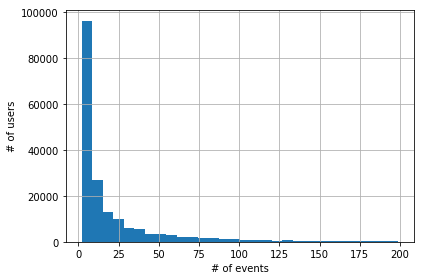

In [4]:
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(True)

user_data.frequency.hist(ax=ax, bins=30)
ax.set_xlabel('# of events')
ax.set_ylabel('# of users')

fig.savefig('figures/number_of_events_firstHalf2016.png')

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


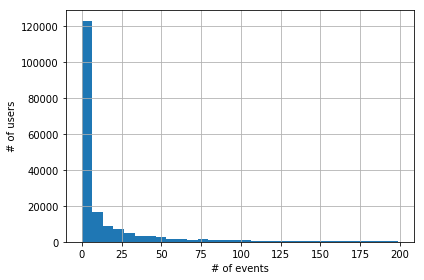

In [5]:
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(True)

user_data.second_period_event_count.hist(ax=ax, bins=30)
ax.set_xlabel('# of events')
ax.set_ylabel('# of users')

fig.savefig('figures/number_of_events_secondHalf2016.png')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5145a8080>,
      dtype=object)

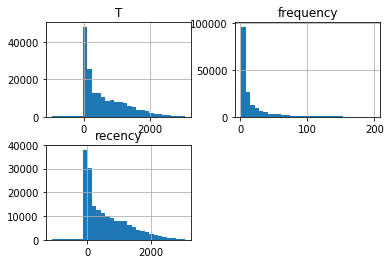

In [6]:
user_data = h.add_time_columns(user_data)
user_data[['frequency', 'T', 'recency']].hist(bins=30)

In [7]:
print('{0}% of users churned in second period'.format(
    np.round(np.sum(user_data.second_period_event_count < 1) / len(user_data) * 100, 2)))

47.6% of users churned in second period


Text(0, 0.5, '# of users')

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


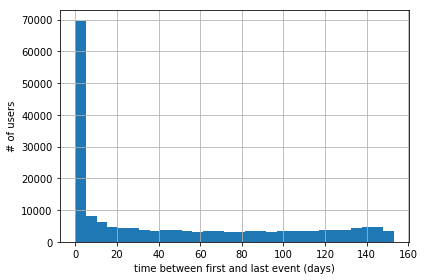

In [8]:
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(True)
user_data.time_between_first_last_event.hist(ax=ax, bins=30)
ax.set_xlabel('time between first and last event (days)')
ax.set_ylabel('# of users')


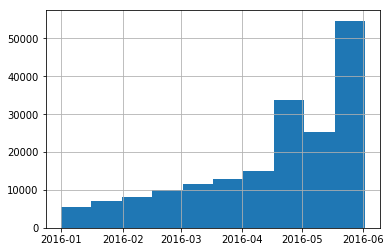

In [9]:
user_data.last_event.hist()

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


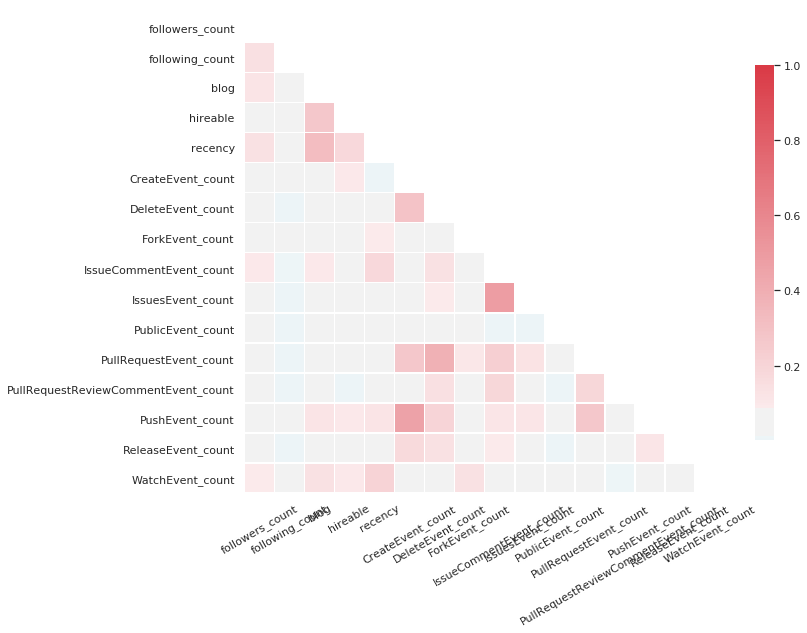

In [10]:
sns.set(style="white")

fig, ax = plt.subplots(1, 1, figsize=[12, 10])
fig.set_tight_layout(True)
corr = user_data.drop(columns=['time_between_first_last_event', 'T', 'frequency', 
                               'second_period_event_count', 'GollumEvent_count',
                               'public_repos_count', 'public_gists_count',
                              'CommitCommentEvent_count',
                              'MemberEvent_count', 'company']).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.05,
            square=True, linewidths=.5, 
            cbar_kws={"shrink": .6},
            yticklabels=corr.columns.values,
            axes=ax)

g.set_xticklabels(corr.columns.values, rotation=30)

fig.savefig('figures/correlation_matrix.svg')
fig.savefig('figures/correlation_matrix.png', dpi=300)

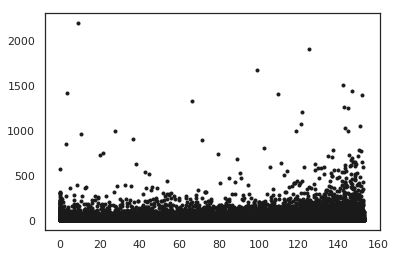

In [11]:
fig, ax = plt.subplots(1,1)

ax.plot(user_data.time_between_first_last_event, user_data.public_repos_count, 'k.')

In [12]:
churned = user_data[user_data.second_period_event_count == 0]
active = user_data[user_data.second_period_event_count > 0]

In [13]:
print('N churned {0}, N active {1}'.format(len(churned), len(active)))

N churned 87387, N active 96188


In [14]:
def plot_active_VS_churned(predictor='frequency'):
    fig, ax = plt.subplots(1,1)
    fig.set_tight_layout(True)

    ax.bar([1, 2], [churned[predictor].mean(), active[predictor].mean()], 
           yerr=[churned[predictor].std() / np.sqrt(len(churned)), 
                 churned[predictor].std() / np.sqrt(len(churned))])
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['churned', 'active'])
    ax.set_ylabel(predictor + ' (Jan-May 2016)')

    fig.savefig('figures/' + predictor + '_churnedVSactive.png')

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


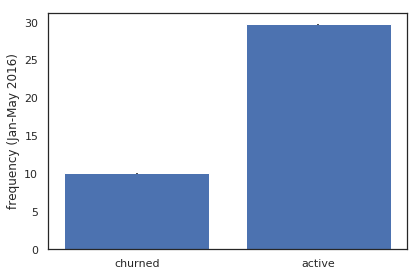

In [15]:
plot_active_VS_churned('frequency')

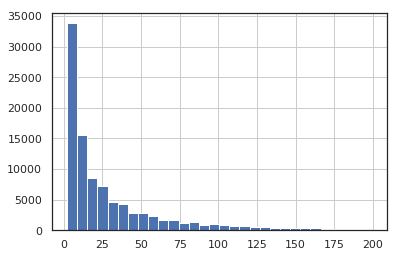

In [16]:
active.frequency.hist(bins=30)

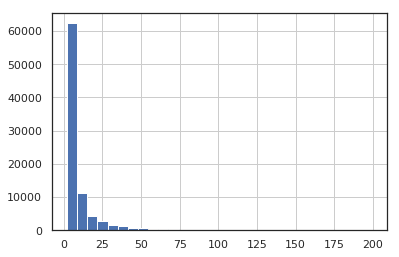

In [17]:
churned.frequency.hist(bins=30)

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


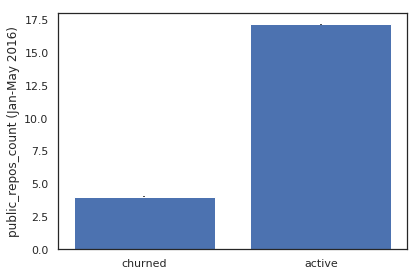

In [18]:
plot_active_VS_churned('public_repos_count')

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


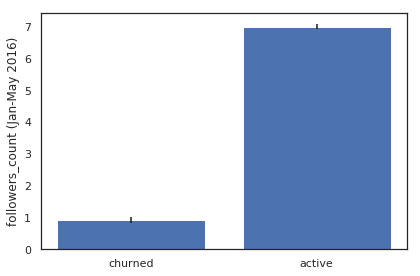

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


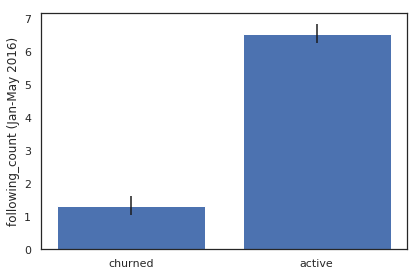

In [19]:
plot_active_VS_churned('followers_count')
plot_active_VS_churned('following_count')

## Segmentation

In [20]:
company_users = user_data[user_data.company == 1]
noncompany_users = user_data[user_data.company == 0]

print('N company users {0}'.format(len(company_users)))
print('N non-company users {0}'.format(len(noncompany_users)))

N company users 28593
N non-company users 154982


"ax[2].plot(log_noncompany_users[:nusers].public_repos_gists, \n           log_noncompany_users[:nusers].non_passive_events, \n           'k.', alpha=0.2)\n"

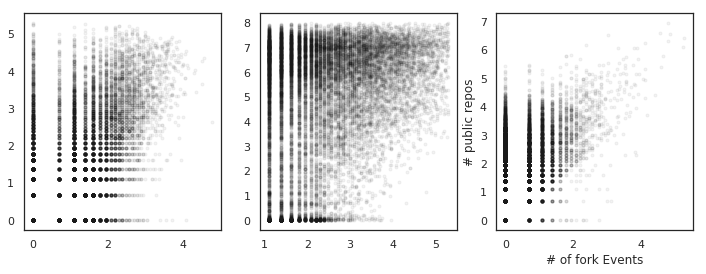

In [21]:
nusers = 20000
noncompany_users = noncompany_users[noncompany_users.recency >= 0]

log_noncompany_users = noncompany_users[
    ['PushEvent_count', 'CommitCommentEvent_count', 'CreateEvent_count',
     'DeleteEvent_count', 'GollumEvent_count', 'IssueCommentEvent_count',
     'MemberEvent_count', 'WatchEvent_count', 'recency', 'ForkEvent_count',
     'frequency', 'public_repos_count', 'public_gists_count']].apply(lambda x: np.log(x + 1))

log_noncompany_users['non_passive_events'] = (noncompany_users[:nusers].frequency -
                                              (noncompany_users[:nusers].DeleteEvent_count + 
                                               noncompany_users[:nusers].GollumEvent_count +
                                               noncompany_users[:nusers].IssueCommentEvent_count +
                                               noncompany_users[:nusers].MemberEvent_count +
                                               noncompany_users[:nusers].WatchEvent_count)
                                             ).apply(lambda x: np.log(x + 1))
log_noncompany_users['public_repos_gists'] = (noncompany_users[:nusers].public_repos_count +
                                              noncompany_users[:nusers].public_gists_count
                                             ).apply(lambda x: np.log(x + 1))

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].plot(log_noncompany_users[:nusers].CreateEvent_count, 
         log_noncompany_users[:nusers].PushEvent_count, 
         'k.', alpha=0.05)

ax[1].plot(log_noncompany_users[:nusers].frequency, 
         log_noncompany_users[:nusers].recency, 
         'k.', alpha=0.05)

ax[2].plot(log_noncompany_users[:nusers].ForkEvent_count, 
         log_noncompany_users[:nusers].public_repos_count, 
         'k.', alpha=0.05)
ax[2].set_xlabel('# of fork Events')
ax[2].set_ylabel('# public repos')
'''ax[2].plot(log_noncompany_users[:nusers].public_repos_gists, 
           log_noncompany_users[:nusers].non_passive_events, 
           'k.', alpha=0.2)
'''
#plt.ylim([0, 75])

/home/brian/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


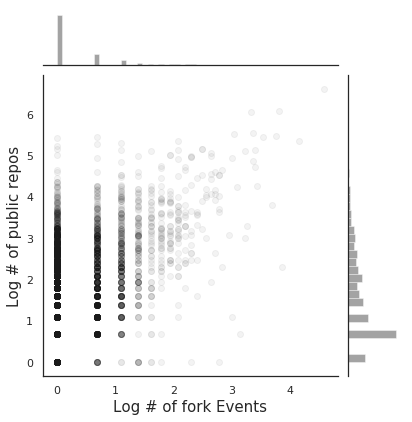

In [28]:
import seaborn as sns

nusers=5000

low = log_noncompany_users[:nusers]#[predictions_df[:nusers].high_low_user.values == 0]

g = sns.jointplot(x="ForkEvent_count", y="public_repos_count", data=low, alpha=0.05, color='k')
g.set_axis_labels('Log # of fork Events', 'Log # of public repos', fontsize=15)

g.savefig('figures/fork_vs_repos.png', dpi=300)

/home/brian/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


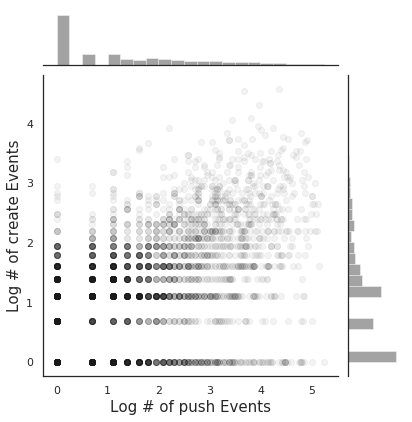

In [29]:
import seaborn as sns

nusers=5000

low = log_noncompany_users[:nusers]#[predictions_df[:nusers].high_low_user.values == 0]

g = sns.jointplot(x="PushEvent_count", y="CreateEvent_count", data=low, alpha=0.05, color='k')
g.set_axis_labels('Log # of push Events', 'Log # of create Events', fontsize=15)

g.savefig('figures/push_vs_create.png', dpi=300)

### K-means clustering 

Define high and low users.

In [ ]:
X = np.array([log_noncompany_users[:nusers].frequency, 
              log_noncompany_users[:nusers].recency]).T
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [ ]:
labels = kmeans.predict(X)
print(labels[:5])
print(np.unique(labels))
print('{0}% labels == 0'.format(np.round(np.sum(labels == 0) / len(labels) * 100, 2)))

In [ ]:
fsize=15
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
fig.set_tight_layout(True)

ax.plot(log_noncompany_users[:nusers].frequency.values[labels == 0], 
             log_noncompany_users[:nusers].recency.values[labels == 0], 
               'r.', alpha=0.2)

ax.plot(log_noncompany_users[:nusers].frequency.values[labels == 1], 
             log_noncompany_users[:nusers].recency.values[labels == 1], 
               'b.', alpha=0.2)

ax.set_ylabel('Log recency', fontsize=fsize)
ax.set_xlabel('Log # of active events', fontsize=fsize)

### Save the KMeans model for later

In [24]:
import pickle
pickle.dump(kmeans, open('high_low_use_KMeans.pickle', 'wb'))
clf2 = pickle.load(open('high_low_use_KMeans.pickle', 'rb'))
clf2.predict(X[:5])

NameError: name 'kmeans' is not defined

### Histogram over all predictors

In [25]:
user_data.describe()

,followers_count,following_count,blog,company,public_repos_count,public_gists_count,hireable,recency,time_between_first_last_event,frequency,...,IssueCommentEvent_count,IssuesEvent_count,MemberEvent_count,PublicEvent_count,PullRequestEvent_count,PullRequestReviewCommentEvent_count,PushEvent_count,ReleaseEvent_count,WatchEvent_count,T
count,183575.000000,183575.000000,183575.000000,183575.000000,183575.000000,183575.000000,183575.000000,183575.000000,183575.000000,183575.000000,...,183575.000000,183575.000000,183575.000000,183575.000000,183575.000000,183575.000000,183575.000000,183575.000000,183575.000000,183575.000000
mean,4.105085,4.059638,0.166531,0.155757,10.891042,1.247365,0.097600,583.902448,46.515546,20.339643,...,1.064677,0.784421,0.227575,0.027035,0.830582,0.095057,9.991742,0.054201,2.264459,629.556258
std,36.119127,75.544398,0.372558,0.362625,27.117144,8.036739,0.296774,666.610131,51.116256,30.665557,...,4.562555,3.193059,1.703893,0.295860,3.271430,1.377101,20.441878,0.668186,8.805675,660.848410
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1099.988484,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-962.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.816782,0.047014,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
50%,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,359.710810,23.528866,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,408.000000
75%,2.000000,2.000000,0.000000,0.000000,12.000000,0.000000,0.000000,998.701470,90.571956,23.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,1.000000,1041.000000
max,4443.000000,19767.000000,1.000000,1.000000,2196.000000,766.000000,1.000000,3044.930301,153.012836,199.000000,...,165.000000,180.000000,187.000000,44.000000,89.000000,157.000000,199.000000,56.000000,193.000000,3045.000000


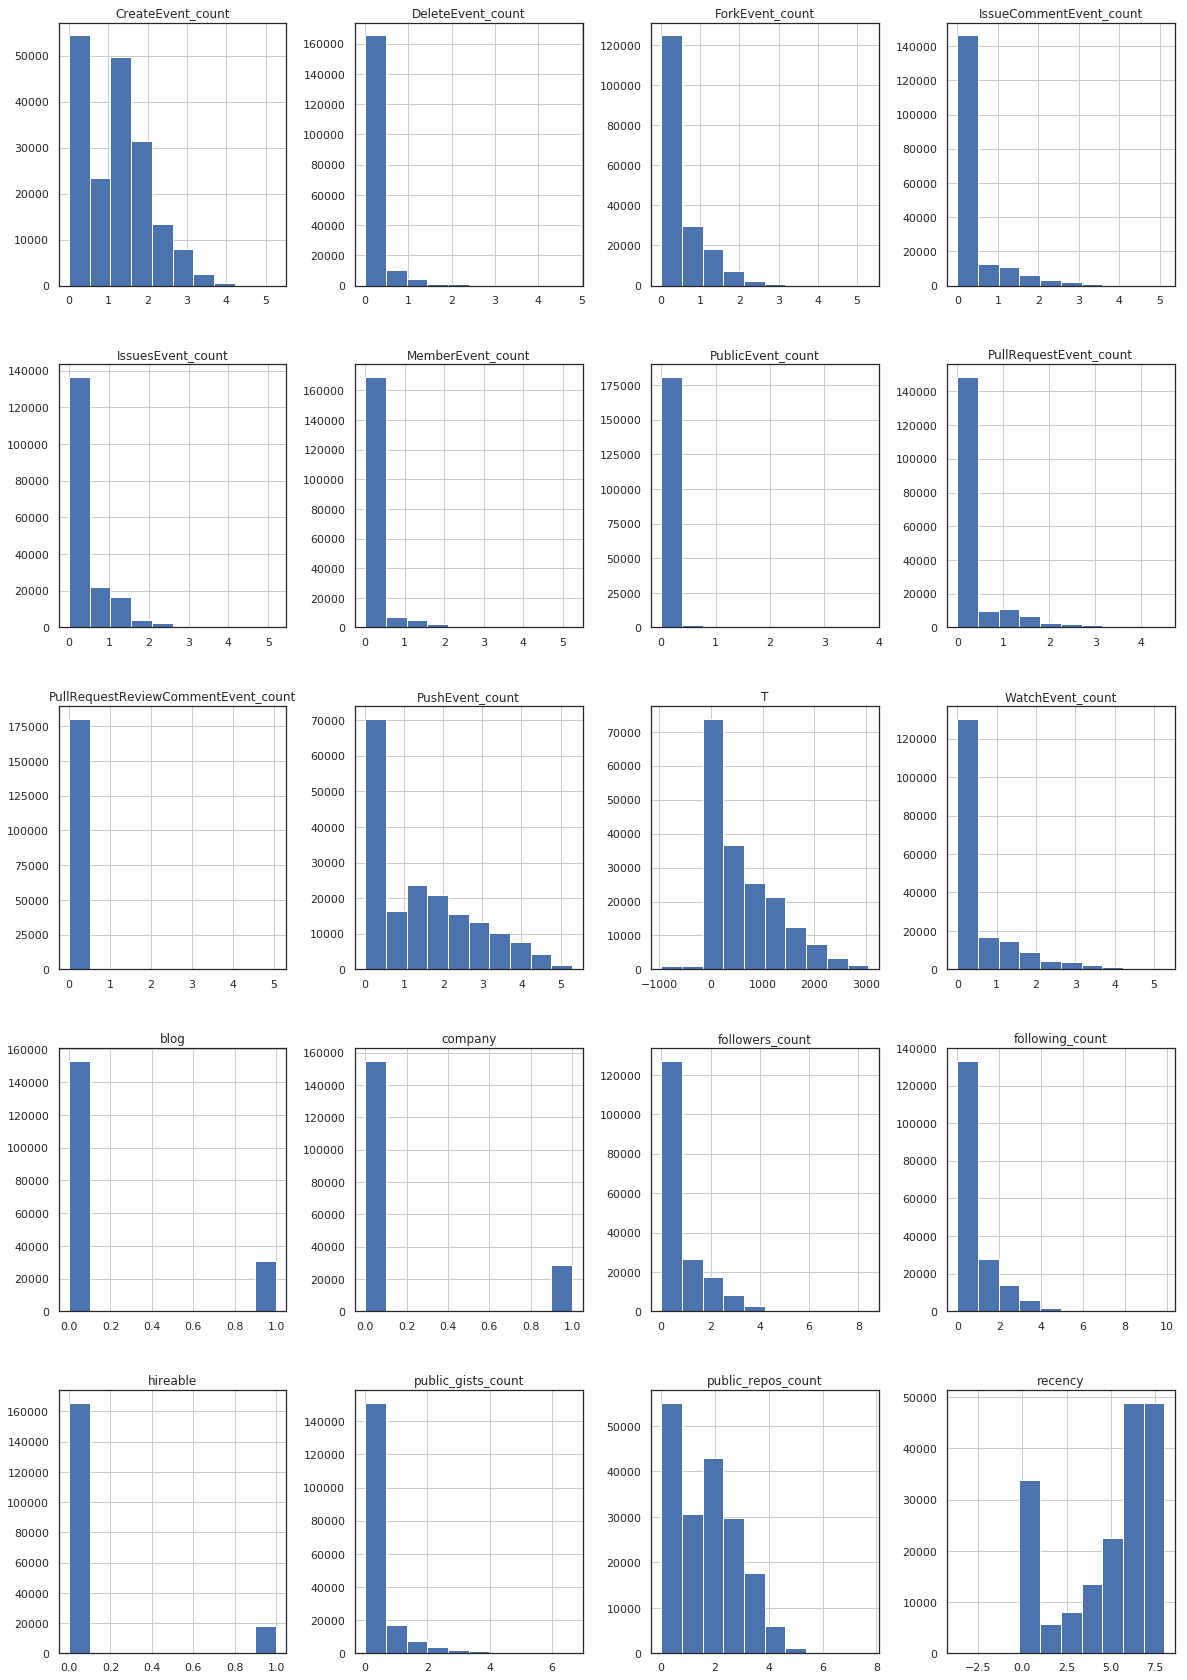

In [27]:
_data = h.feature_scaling(user_data)
_data = _data.drop(columns=['time_between_first_last_event', 'GollumEvent_count', 'ReleaseEvent_count',
                               'frequency','second_period_event_count', 'CommitCommentEvent_count'])
fig, ax = plt.subplots(5, 4, figsize=(20, 30))
_data.hist(ax=ax)
fig.savefig('figures/feature_histograms.png')